In [1]:
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
%matplotlib inline

In [2]:
dta = [10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422,
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355,
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767,
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232,
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248,
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722,
11999,9390,13481,14795,15845,15271,14686,11054,10395]

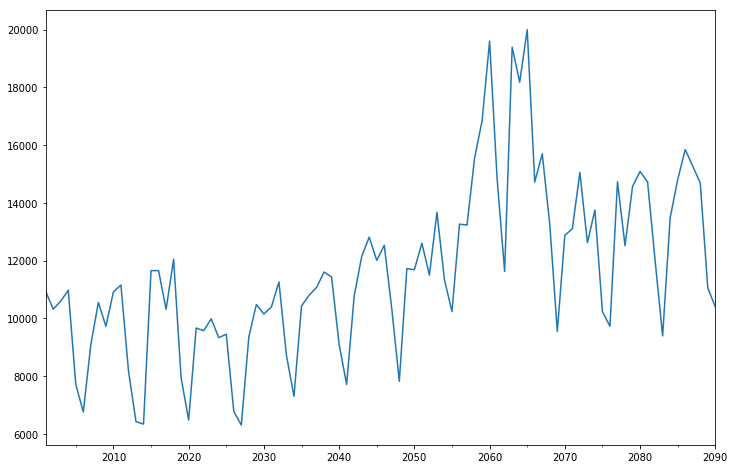

In [3]:
dta = pd.Series(dta)
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001', '2090'))
dta.plot(figsize=(12, 8))

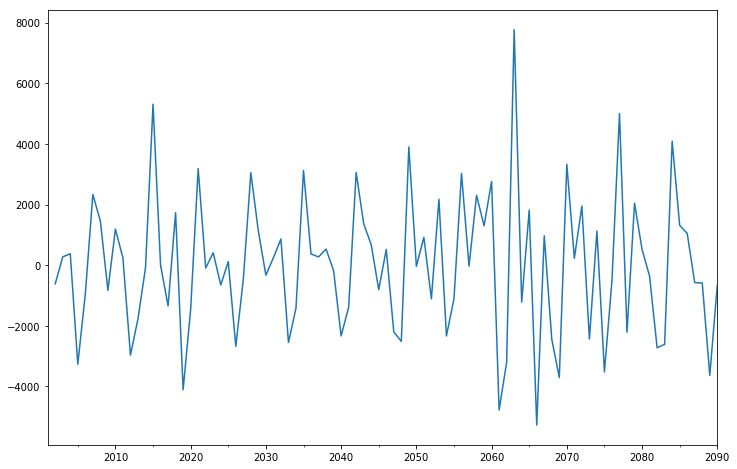

In [4]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

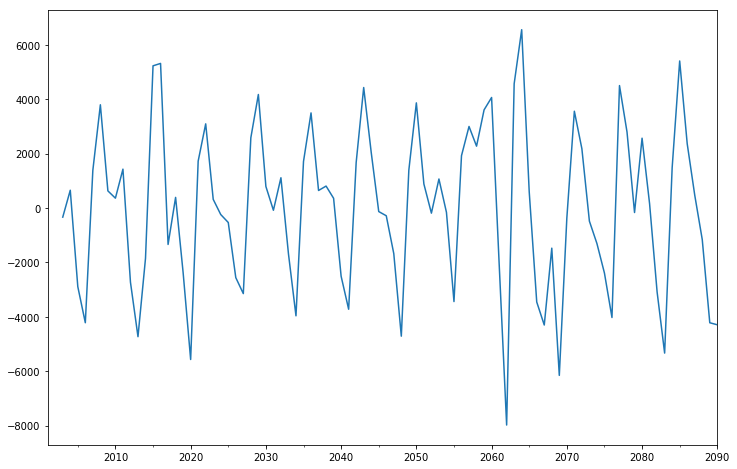

In [5]:
fig = plt.figure(figsize=(12, 8))
ax2 = fig.add_subplot(111)
diff2 = dta.diff(2)
diff2.plot(ax=ax2)

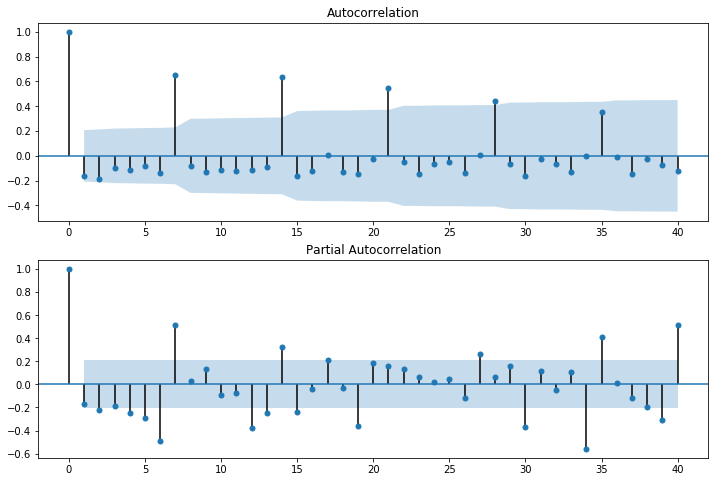

In [6]:
dta = dta.diff(1).dropna()
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)

In [7]:
arma_mod20 = sm.tsa.ARMA(dta,(7,0)).fit()
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)
arma_mod30 = sm.tsa.ARMA(dta,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod40 = sm.tsa.ARMA(dta,(7,1)).fit()
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic)
arma_mod50 = sm.tsa.ARMA(dta,(8,0)).fit()
print(arma_mod50.aic,arma_mod50.bic,arma_mod50.hqic)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


1579.7025549172415 1602.1002822448309 1588.7304360492988
1632.3203733166176 1639.786282425814 1635.3296670273035


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


1581.0916055112652 1605.9779692085867 1591.1225845468846


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


1581.3957836611476 1606.282147358469 1591.426762696767


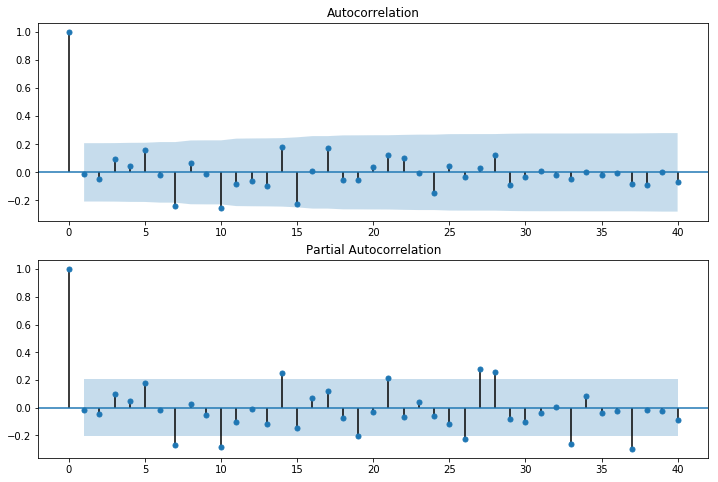

In [8]:
resid = arma_mod20.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

In [9]:
print(sm.stats.durbin_watson(arma_mod20.resid.values))

2.0242493239526347


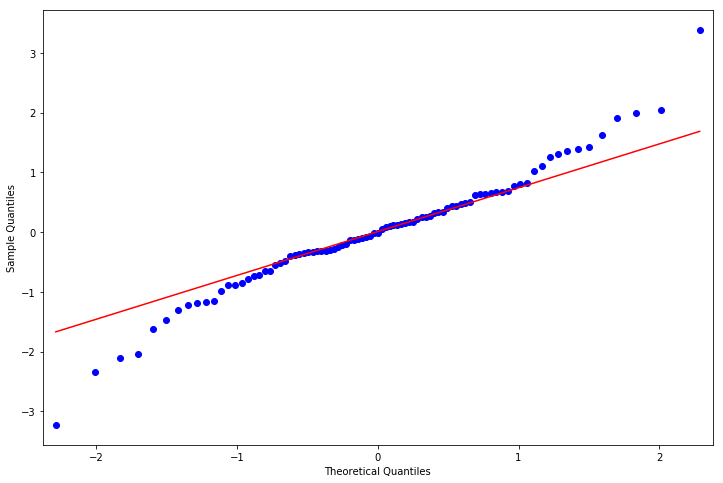

In [10]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

In [11]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0  -0.014445   0.019205  0.889782
2.0  -0.047442   0.228731  0.891932
3.0   0.097777   1.129070  0.770062
4.0   0.047513   1.344168  0.853839
5.0   0.156218   3.697128  0.593791
6.0  -0.017856   3.728240  0.713397
7.0  -0.241229   9.475699  0.220282
8.0   0.068079   9.939121  0.269325
9.0  -0.012041   9.953799  0.354238
10.0 -0.256683  16.708396  0.081071
11.0 -0.085178  17.461734  0.094940
12.0 -0.063577  17.886878  0.119169
13.0 -0.096511  18.879470  0.126888
14.0  0.181119  22.421882  0.070351
15.0 -0.223096  27.869230  0.022402
16.0  0.012916  27.887739  0.032610
17.0  0.176768  31.402601  0.017834
18.0 -0.053140  31.724726  0.023695
19.0 -0.057704  32.109981  0.030375
20.0  0.037426  32.274394  0.040461
21.0  0.120520  34.004369  0.036200
22.0  0.102663  35.278402  0.036226
23.0 -0.007829  35.285925  0.048712
24.0 -0.148547  38.035369  0.034385
25.0  0.046254  38.306109  0.043174
26.0 -0.032622  38.442914  0

2090-12-31   -1236.142498
2091-12-31    3548.947002
2092-12-31    1236.638579
2093-12-31     649.912315
2094-12-31    -530.549382
2095-12-31    -611.717565
2096-12-31   -2290.238030
2097-12-31    -726.596545
2098-12-31    2740.789054
2099-12-31     952.949481
2100-12-31     277.176871
Freq: A-DEC, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


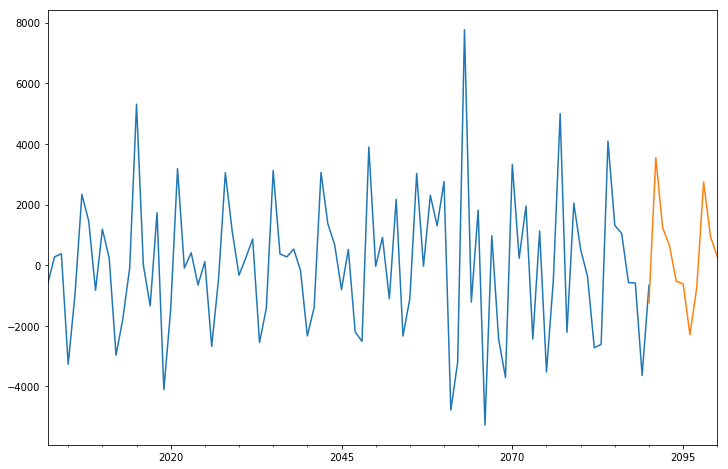

In [12]:
predict_sunspots = arma_mod20.predict('2090', '2100', dynamic=True)
print(predict_sunspots)
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['2001':].plot(ax=ax)
predict_sunspots.plot(ax=ax)